# 2-Programming Exercise 2: Logistic Regression Coursera (Classification)

### The same task but with sklearn 

**The first file manual_logistic_regression has some of handling**

##  Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from manual_logistic_regression import init_2d_graphs,features_normalization_with_std, cost_function
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

Some of positive points
       exam_1     exam_2  admitted
3  60.182599  86.308552         1
4  79.032736  75.344376         1
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
Some of positive points
        exam_1     exam_2  admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
5   45.083277  56.316372         0
10  95.861555  38.225278         0
Theats shape is:  (3, 1)
######################################################################
Theats values are:  [[0.]
 [0.]
 [0.]]
######################################################################
First 5 values now of the features are:  [[34.62365962 78.02469282  1.        ]
 [30.28671077 43.89499752  1.        ]
 [35.84740877 72.90219803  1.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
The cost funtion of our training data is:  [[0.69314718]]
Instead of Thetas as zero now theta

###  Read CSV file

In [2]:
df_file = pd.read_csv('csv_files/ex2data1.csv')
df_file.head()

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
positive_points = df_file[df_file['admitted'] == 1]
print("Some of positive points\n", positive_points[:5])

Some of positive points
       exam_1     exam_2  admitted
3  60.182599  86.308552         1
4  79.032736  75.344376         1
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1


In [4]:
negative_points = df_file[df_file['admitted'] == 0]
print("Some of positive points\n", negative_points[:5])

Some of positive points
        exam_1     exam_2  admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
5   45.083277  56.316372         0
10  95.861555  38.225278         0


Text(0, 0.5, 'Exam 2 Score')

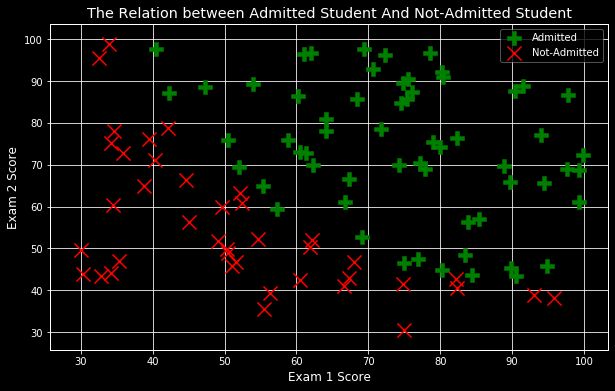

In [5]:
init_2d_graphs('ggplot', 'dark_background' )

plt.scatter(positive_points['exam_1'],positive_points['exam_2'], s = 200, c = 'green', marker = 'P', label =  'Admitted')
plt.scatter(negative_points['exam_1'],negative_points['exam_2'], s = 200, c = 'red', marker = 'x', label =  'Not-Admitted')
plt.title("The Relation between " + 'Admitted Student' + " And " + 'Not-Admitted Student' )
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

In [6]:
x = np.array(df_file.iloc[:, :-1]) # x_axis
y = np.array(df_file.iloc[:, -1]) # y_axis
thetas = np.zeros((3,1))
m = len(y)
# y = y.values.reshape(len(x),1) # because of type Series we use .values

In [7]:
y = y.reshape(-1,1) # because of type Series we use .values
y.shape

(100, 1)

In [8]:
X = np.c_[x, np.ones((m,1))]
X.shape

(100, 3)

##  Now start to implement gradient descent but with sklearn

In [12]:
LORegression = LogisticRegression(solver='liblinear')

In [13]:
LORegression.fit(X,y)

/home/abdelrahman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
LORegression.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)>

In [15]:
print("The Slope or Weights of LRModel is", LORegression.coef_)

The Slope or Weights of LRModel is [[ 0.05214733  0.04531467 -2.85831439]]


In [16]:
print("The Slope or Weights of LRModel is", LORegression.intercept_)

The Slope or Weights of LRModel is [-2.85831439]


In [17]:
y_hat = LORegression.predict(X)

In [18]:
print("The f1-score of our data is: ", f1_score(y_hat, y))

The f1-score of our data is:  0.9291338582677166


## we can also get the cost function

**from manual_logistic_regression we call the cost function**

LORegression.coef_ is our last_thetas

In [19]:
last_thetas = LORegression.coef_
# last_thetas = last_thetas.reshape(-1,1)
print(last_thetas.shape) # transpose 
cost_function = cost_function(last_thetas.T, X, m ,y)
print("The cost is: ", cost_function)

(1, 3)
The cost is:  [[0.98954401]]


In [21]:
# The second file

In [22]:
df_file = pd.read_csv('csv_files/ex2data2.csv')
df_file.head()

,test_1,test_2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## Visualizing the data

In [25]:
positive_points = df_file[df_file['Accepted'] == 1]
print("Some of positive points\n", positive_points[:5])

Some of positive points
      test_1   test_2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1


In [26]:
negative_points = df_file[df_file['Accepted'] == 0]
print("Some of positive points\n", negative_points[:5])

Some of positive points
      test_1   test_2  Accepted
58  0.18376  0.93348         0
59  0.22408  0.77997         0
60  0.29896  0.61915         0
61  0.50634  0.75804         0
62  0.61578  0.72880         0


Text(0, 0.5, 'Test 2 ')

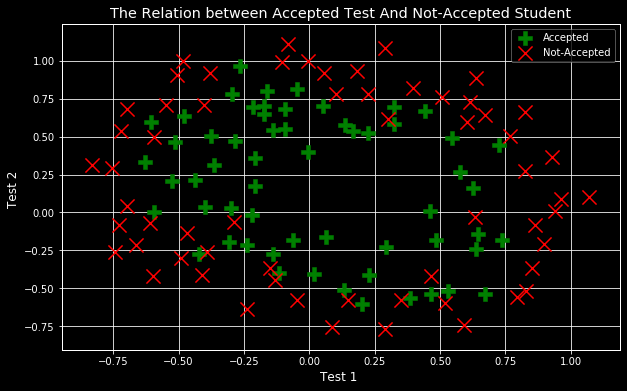

In [27]:
init_2d_graphs('ggplot', 'dark_background' )

plt.scatter(positive_points['test_1'],positive_points['test_2'], s = 200, c = 'green', marker = 'P', label =  'Accepted')
plt.scatter(negative_points['test_1'],negative_points['test_2'], s = 200, c = 'red', marker = 'x', label =  'Not-Accepted')
plt.title("The Relation between " + 'Accepted Test' + " And " + 'Not-Accepted Student' )
plt.legend()
plt.xlabel('Test 1 ')
plt.ylabel('Test 2 ')

## Feature mapping

**Some times you increase your features to fit the data well**

In [29]:
x = np.array(df_file.iloc[:, :-1])
y = np.array(df_file.iloc[:, -1])
m = len(y)
y = y.reshape(-1,1)


In [30]:
for i in range(1,6):
    for j in range(i):
        '''
        mapping features is to make polynomial features from linear here is to power 4
        '''
        df_file['F' + str(i) + str(j)] = np.power(x[:, 0], i-j) * np.power(x[:, 1], j)

In [31]:
df_file.head()

,test_1,test_2,Accepted,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43,F50,F51,F52,F53,F54
0,0.051267,0.69956,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551,3.541519e-07,0.000005,0.000066,0.000900,0.012278
1,-0.092742,0.68494,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412
2,-0.213710,0.69225,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077
3,-0.375000,0.50219,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851
4,-0.513250,0.46564,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128


In [32]:
x = np.array(df_file.iloc[:, 3:])
X = np.c_[x, np.ones(m)] # add x0 = 1
thetas = np.zeros((X.shape[1],1)) # initialize threats as 2d with number of features

##  Now start to implement gradient descent but with sklearn

In [33]:
LORegression = LogisticRegression(solver='sag')

In [38]:
LORegression.fit(X,y)

/home/abdelrahman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_hat = LORegression.predict(X)
print("The f1-score of our data is: ", f1_score(y_hat, y))

The f1-score of our data is:  0.6929133858267716
